In [1]:
from google.colab import drive

In [2]:
drive.mount("/F")

Mounted at /F


In [5]:
!ls '/F/My Drive/Maratona/Rede Recorrentes/'

 petr4.csv  'ST Rede Recorrentes.ipynb'


In [6]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 41kB/s 


In [8]:
import pandas as pd

In [10]:
base = pd.read_csv('/F/My Drive/Maratona/Rede Recorrentes/petr4.csv')

In [11]:
base = base.dropna()

In [12]:
base = base.iloc[:, 1].values

In [13]:
import matplotlib.pyplot as plt

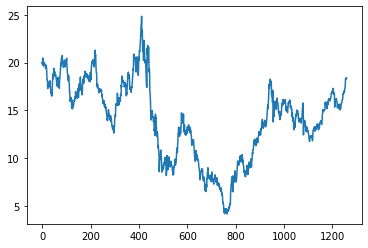

In [14]:
plt.plot(base)

In [15]:
periodos = 30
previsao_futura = 1 # horizonte

X = base[0:(len(base) - (len(base) % periodos))]
X_batches = X.reshape(-1, periodos, 1)

y = base[1:(len(base) - (len(base) % periodos)) + previsao_futura]
y_batches = y.reshape(-1, periodos, 1)

X_teste = base[-(periodos + previsao_futura):]
X_teste = X_teste[:periodos]
X_teste = X_teste.reshape(-1, periodos, 1)
y_teste = base[-(periodos):]
y_teste = y_teste.reshape(-1, periodos, 1)

In [16]:
X_batches.shape, y_batches.shape, X_teste.shape, y_teste.shape

((41, 30, 1), (41, 30, 1), (1, 30, 1), (1, 30, 1))

In [17]:
import tensorflow as tf

In [18]:
entradas = 1
neuronios_oculta = 100
neuronios_saida = 1

#**RNN**

In [19]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.rnn = tf.keras.layers.SimpleRNN(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.rnn(inputs)
        x = self.dense(x)

        return x

In [20]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    # Uma das vantagens de escrever o modelo como uma instância de `tf.keras.Model`
    # é que podemos recuperar a `var_list` com `model.trainable_variables`
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  46.66949690633101
101  erro:  0.6306342120248827
201  erro:  0.19916619174358505
301  erro:  0.19281706508768182
401  erro:  0.19058033503483132
501  erro:  0.18754117697636907
601  erro:  0.18505598488785377
701  erro:  0.18263081853289947
801  erro:  0.18111765179906494
901  erro:  0.1789792477276417


In [21]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[15.433546 ],
        [15.584803 ],
        [15.066893 ],
        [14.979462 ],
        [15.107006 ],
        [15.205252 ],
        [15.257202 ],
        [15.312211 ],
        [15.562252 ],
        [15.708969 ],
        [15.8279505],
        [15.9720745],
        [15.981689 ],
        [16.255745 ],
        [16.145437 ],
        [16.422794 ],
        [16.734837 ],
        [16.687706 ],
        [16.747698 ],
        [16.90313  ],
        [16.89748  ],
        [16.88785  ],
        [16.947844 ],
        [17.222286 ],
        [17.363781 ],
        [17.830399 ],
        [18.287281 ],
        [18.354654 ],
        [18.26111  ],
        [18.269222 ]]], dtype=float32)>

In [22]:
import numpy as np

In [23]:
y_teste2 = np.ravel(y_teste)

In [24]:
previsoes2 = np.ravel(previsoes.numpy())

In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
mae = mean_absolute_error(y_teste2, previsoes2)
mae

0.1803420031412763

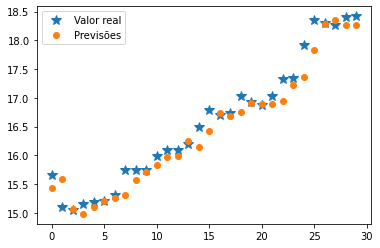

In [27]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

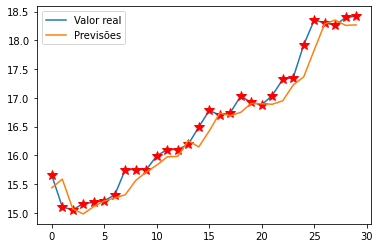

In [28]:
plt.plot(y_teste2, label = 'Valor real')
plt.plot(y_teste2, 'w*', markersize = 10, color = 'red')
plt.plot(previsoes2, label = 'Previsões')
plt.legend()

#**LSTM**

In [42]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.lstm = tf.keras.layers.LSTM(units = neuronios_oculta, activation = 'relu', return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm(inputs)
        x = self.dense(x)

        return x

In [43]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    # Uma das vantagens de escrever o modelo como uma instância de `tf.keras.Model`
    # é que podemos recuperar a `var_list` com `model.trainable_variables`
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  210.9166759296301
101  erro:  6.751755251799117
201  erro:  2.860249884495452
301  erro:  0.8862633054569783
401  erro:  0.20783970206370472
501  erro:  0.2539866646450826
601  erro:  0.18950185997289815
701  erro:  0.18700044999263052
801  erro:  0.18736476885250913
901  erro:  0.17217110879516045


In [44]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[15.358621],
        [15.652711],
        [15.095716],
        [15.13829 ],
        [15.30196 ],
        [15.216505],
        [15.172377],
        [15.226792],
        [15.610461],
        [15.715764],
        [15.781923],
        [16.031107],
        [16.145754],
        [16.104261],
        [16.140432],
        [16.414532],
        [16.71208 ],
        [16.69291 ],
        [16.703968],
        [16.976473],
        [17.09134 ],
        [17.10069 ],
        [17.122667],
        [17.259949],
        [17.416042],
        [18.024595],
        [18.556353],
        [18.710707],
        [18.498394],
        [18.12664 ]]], dtype=float32)>

In [45]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

0.19724510656127972

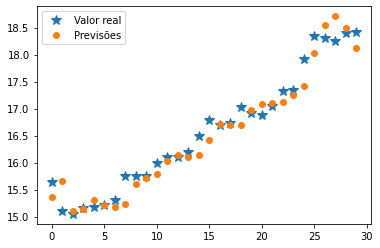

In [46]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

#**Múltiplas Camadas LSTM**

In [47]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        lstms = [tf.keras.layers.LSTMCell(units = neuronios_oculta, activation = 'relu') for _ in range(4)]
        stacked_lstm = tf.keras.layers.StackedRNNCells(cells = lstms)
        self.lstm_layer = tf.keras.layers.RNN(cell = stacked_lstm, return_sequences = True)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm_layer(inputs)
        x = self.dense(x)

        return x

In [48]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    # Uma das vantagens de escrever o modelo como uma instância de `tf.keras.Model`
    # é que podemos recuperar a `var_list` com `model.trainable_variables`
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  218.3757790915595
101  erro:  19.614651438581713
201  erro:  4.940772934864319
301  erro:  0.5744099769632985
401  erro:  0.23654060929636744
501  erro:  0.18537821435925952
601  erro:  0.14914509471449908
701  erro:  0.20148884605333736
801  erro:  0.1436056937699169
901  erro:  0.14606525226947378


In [49]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[15.570175 ],
        [15.371419 ],
        [15.432842 ],
        [15.205572 ],
        [15.4274435],
        [15.598071 ],
        [15.464164 ],
        [15.300832 ],
        [15.3659725],
        [15.371736 ],
        [15.378749 ],
        [15.484525 ],
        [15.603263 ],
        [15.714236 ],
        [15.865002 ],
        [16.177956 ],
        [16.35173  ],
        [16.65142  ],
        [16.542912 ],
        [16.596367 ],
        [16.550426 ],
        [16.152994 ],
        [16.45625  ],
        [17.23054  ],
        [17.185762 ],
        [16.753664 ],
        [16.515182 ],
        [17.191385 ],
        [17.999407 ],
        [17.79552  ]]], dtype=float32)>

In [50]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

0.5291169746948245

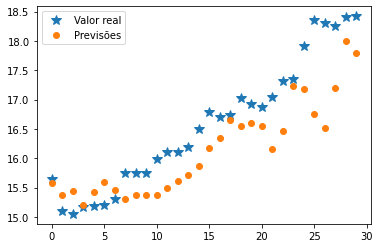

In [51]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()

#**Com Dropout**

In [37]:
class Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        lstms = [tf.keras.layers.LSTMCell(units = neuronios_oculta, activation = 'relu') for _ in range(4)]
        stacked_lstm = tf.keras.layers.StackedRNNCells(cells = lstms)
        self.lstm_layer = tf.keras.layers.RNN(cell = stacked_lstm, return_sequences = True)
        self.dropout = tf.keras.layers.Dropout(rate = 0.1)
        self.dense = tf.keras.layers.Dense(units = neuronios_saida)
    
    def call(self, inputs):
        x = self.lstm_layer(inputs)
        x = self.dropout(x)
        x = self.dense(x)

        return x

In [38]:
model = Model()
otimizador = tf.keras.optimizers.Adam(learning_rate = 0.001)

for epoca in range(1000):
    with tf.GradientTape() as tape:
        out = model(X_batches)
        erro = tf.keras.losses.mean_squared_error(out, y_batches)
    
    # Uma das vantagens de escrever o modelo como uma instância de `tf.keras.Model`
    # é que podemos recuperar a `var_list` com `model.trainable_variables`
    gradientes = tape.gradient(erro, model.trainable_variables)
    otimizador.apply_gradients(zip(gradientes, model.trainable_variables))

    if epoca % 100 == 0:
        print(epoca + 1, ' erro: ', tf.reduce_mean(erro).numpy())

1  erro:  209.72134364924787
101  erro:  15.183804328969202
201  erro:  1.950332893920688
301  erro:  0.41618254737550725
401  erro:  0.1884942186869392
501  erro:  0.1442487887778749
601  erro:  0.13616007995328785
701  erro:  0.11923969452372975
801  erro:  0.2184069441791267
901  erro:  0.12907508603345474


In [39]:
previsoes = model(X_teste)
previsoes

<tf.Tensor: shape=(1, 30, 1), dtype=float32, numpy=
array([[[15.284987],
        [15.702828],
        [15.169204],
        [15.008258],
        [15.123098],
        [15.196522],
        [15.170273],
        [15.286366],
        [15.418813],
        [15.712694],
        [15.811634],
        [15.987103],
        [16.082315],
        [16.02181 ],
        [16.001825],
        [16.30756 ],
        [16.605944],
        [16.704227],
        [16.836954],
        [16.868559],
        [16.761171],
        [16.882292],
        [16.889992],
        [17.132746],
        [17.308184],
        [17.840336],
        [18.354935],
        [18.610971],
        [18.708387],
        [18.48898 ]]], dtype=float32)>

In [40]:
y_teste2 = np.ravel(y_teste)
previsoes2 = np.ravel(previsoes.numpy())
mae = mean_absolute_error(y_teste2, previsoes2)
mae

0.23038817605590864

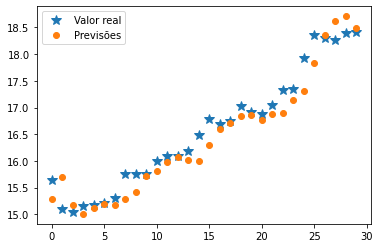

In [41]:
plt.plot(y_teste2, '*', markersize = 10, label = 'Valor real')
plt.plot(previsoes2, 'o', label = 'Previsões')
plt.legend()